In [ ]:
#The Process taken to train the model is as follows:
#1. Load the data
#2. Preprocess the data
#3. Create the model
#4. Train the model
#5. Evaluate the model
#6. Save the model
#7. Make predictions
#8. Save the predictions
#9. Load the model
#10. Load the predictions
#11. Evaluate the model on the predictions
#12. Make predictions on new data
#13. Save the new predictions
#14. Load the new predictions
#15. Evaluate the model on the new predictions 


In [ ]:
#Importation of Required Library
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report



In [ ]:
#Importation and Loading of Datasets
df = pd.read_csv('breast_cancer_updated.csv', index_col=0)
df.head()

In [78]:
#Shape of the Datsaset Showing the Number of Rows and Columns
df.shape

(5015, 31)

In [ ]:
#Summary of the Dataset Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5015 entries, 1 to 5015
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                5015 non-null   int64  
 1   radius_mean              5015 non-null   float64
 2   texture_mean             5015 non-null   float64
 3   perimeter_mean           5015 non-null   float64
 4   area_mean                5015 non-null   float64
 5   smoothness_mean          5015 non-null   float64
 6   compactness_mean         5015 non-null   float64
 7   concavity_mean           5015 non-null   float64
 8   concave points_mean      5015 non-null   float64
 9   symmetry_mean            5015 non-null   float64
 10  fractal_dimension_mean   5015 non-null   float64
 11  radius_se                5015 non-null   float64
 12  texture_se               5015 non-null   float64
 13  perimeter_se             5015 non-null   float64
 14  area_se                  5015

In [79]:
#Checking for Missing Values in the Dataset using Columns
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [80]:
#Checking for Missing Values in all the Dataset
df.isnull().sum().sum()

#We have no missing values in the Dataset

0

In [81]:
#Counting the numbers of Benign and Malignant Diagnosis
#Benign Means the Tumor is not Cancerous
#Malignant Means the Tumor is Cancerous
df['diagnosis'].value_counts()

diagnosis
1    3149
0    1866
Name: count, dtype: int64

<Axes: ylabel='count'>

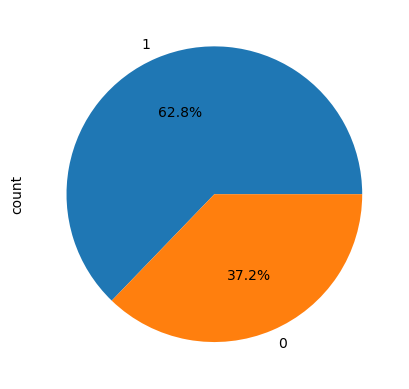

In [82]:
#Putting the Diagnosis in a Pie Chart
df['diagnosis'].value_counts().plot(kind='pie', autopct='%1.1f%%')
#This show that the Diagnosis has more Cancerous Tumor than Non-Cancerous Tumor

C:\Users\iamse\AppData\Local\Temp\ipykernel_11992\3878009407.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, label='count', palette=['#1f77b4', '#ff7f0e'])


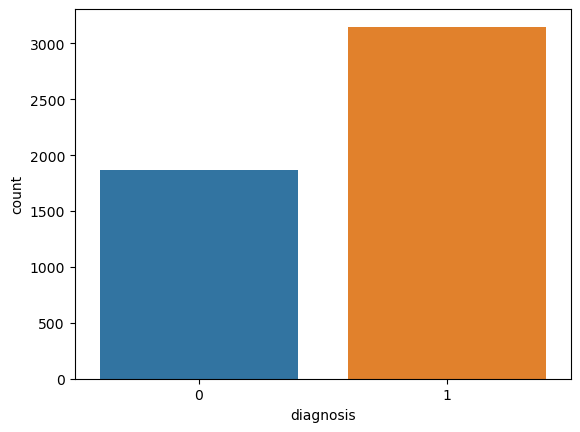

In [85]:
#Showing Data Distribution of the Diagnosis
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='diagnosis', data=df, label='count', palette=['#1f77b4', '#ff7f0e'])
plt.show()

In [87]:
#Label Encoding the Diagnosis Column
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Transformation of Categorical Data into Numberical Data

df['diagnosis'] = labelencoder.fit_transform(df['diagnosis'])
df.head()
	


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
1,1,0.425053,5.965067,1.878999,-1.922577,-8.191107,-9.662919,-0.619291,-1.315248,-4.107378,...,0.615896,2.002757,-0.201908,0.120528,0.035929,-0.582654,10.078263,3.396570,-0.474207,0.938795
2,0,-0.720491,1.122032,0.702666,0.588757,-2.897603,6.737809,0.293614,-2.898675,2.812344,...,-1.545681,0.131865,-1.040233,-0.323723,1.218420,0.165080,0.415971,-2.714283,2.652932,-0.403200
3,0,1.624526,0.466168,1.600550,2.200664,4.272945,2.390065,0.614031,-0.314448,1.867168,...,-0.118669,-1.379621,-1.324658,-0.282837,5.802867,-0.325060,-4.156908,1.968221,-0.054791,0.076663
4,1,-1.124956,-2.165492,-0.215090,-1.795210,-6.011122,-7.283305,0.147977,-1.520045,-4.330120,...,1.001215,0.350980,-0.173384,1.782559,-2.723687,-6.602257,-8.789461,5.394188,0.201087,-0.310054
5,0,-0.349488,-1.915211,-2.885086,-0.182034,1.586092,1.645780,-0.532385,-1.009785,-1.919263,...,-0.538012,1.444644,0.758448,-0.303827,4.672285,-5.195357,-3.044978,1.988163,-0.465882,-0.207049


In [88]:
# The Diagnosis Column has been Transformed into Numerical Data with 0 and 1
# 0 Means the Tumor is not Cancerous
# 1 Means the Tumor is Cancerous
df['diagnosis'] .values

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

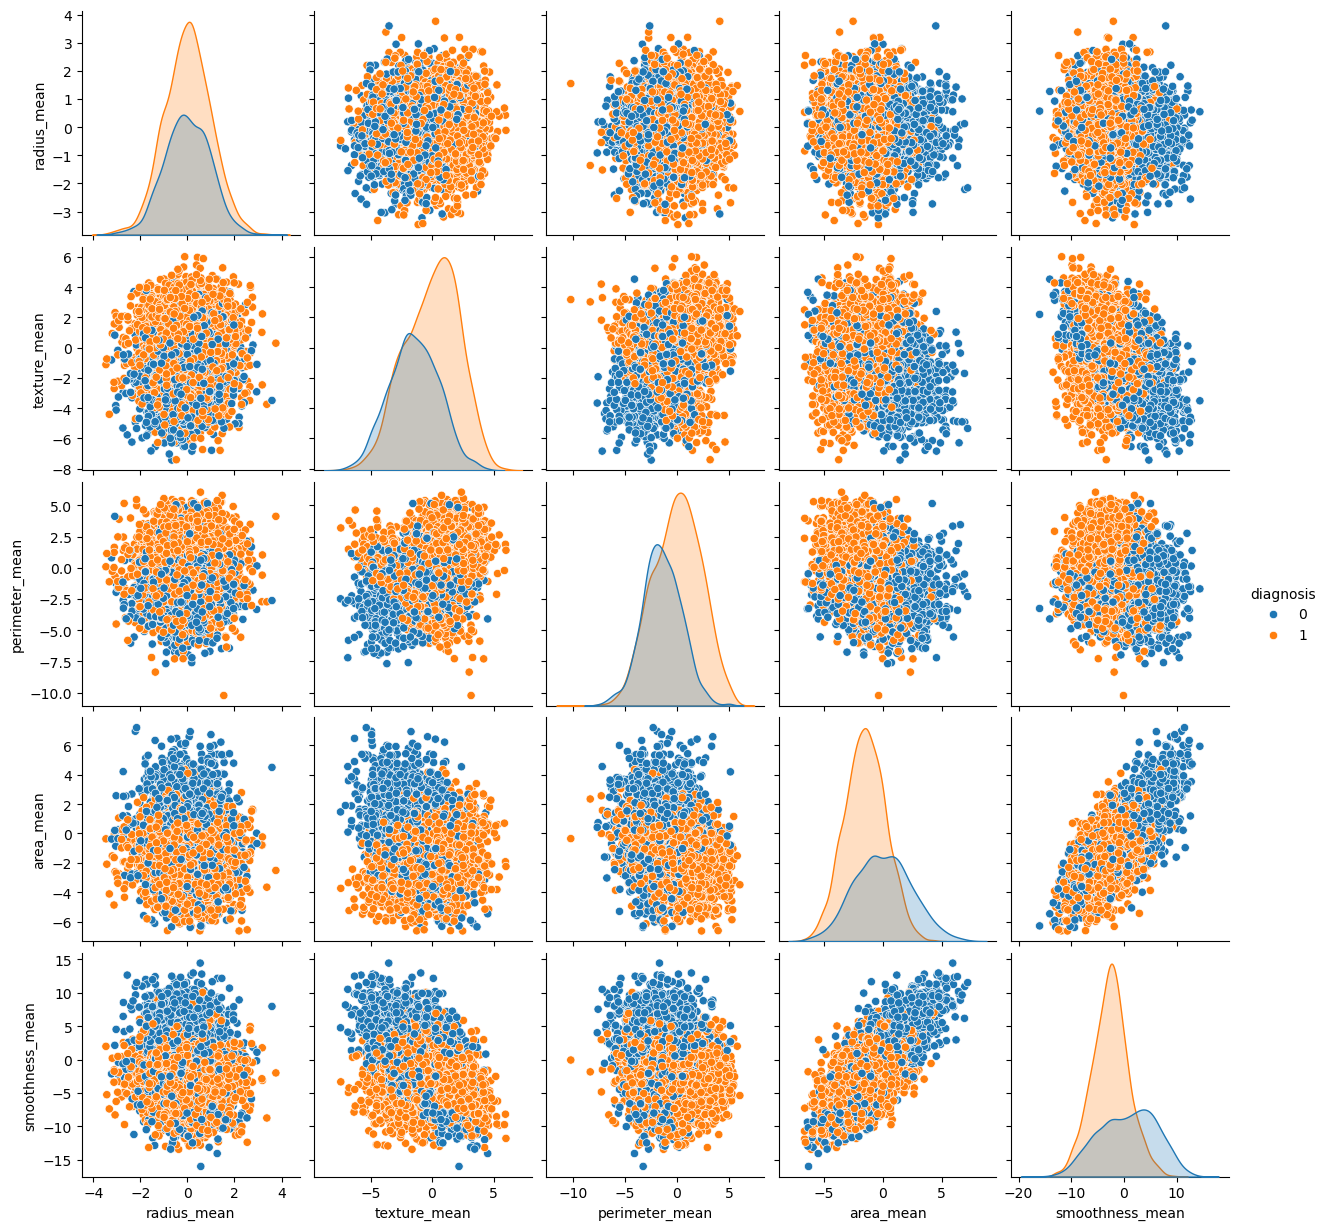

In [89]:
#Pair Plot of the Dataset According to the Diagnosis
sns.pairplot(df, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'])
plt.show()

In [90]:
#Correlation Matrix of the first 11 Columns
#df.corr()
df.iloc[:, 0:11].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.012779,0.314980,0.310196,-0.342366,-0.347741,-0.762444,-0.015318,0.018771,-0.606766,0.014359
radius_mean,0.012779,1.000000,0.008935,0.002735,-0.036553,-0.036465,-0.020927,0.001237,0.016022,-0.018392,0.006012
texture_mean,0.314980,0.008935,1.000000,0.287808,-0.125401,-0.349644,-0.340443,-0.002167,0.012355,0.066056,0.322277
perimeter_mean,0.310196,0.002735,0.287808,1.000000,-0.251965,-0.160266,-0.505408,-0.013505,0.001689,-0.235795,0.211732
area_mean,-0.342366,-0.036553,-0.125401,-0.251965,1.000000,0.720358,0.557554,-0.015701,-0.009611,0.268094,-0.095712
smoothness_mean,-0.347741,-0.036465,-0.349644,-0.160266,0.720358,1.000000,0.472848,-0.003294,0.004784,0.247573,-0.194623
compactness_mean,-0.762444,-0.020927,-0.340443,-0.505408,0.557554,0.472848,1.000000,0.013842,-0.017701,0.617083,0.099378
concavity_mean,-0.015318,0.001237,-0.002167,-0.013505,-0.015701,-0.003294,0.013842,1.000000,0.030105,0.020022,0.009802
concave points_mean,0.018771,0.016022,0.012355,0.001689,-0.009611,0.004784,-0.017701,0.030105,1.000000,0.001276,-0.011647
symmetry_mean,-0.606766,-0.018392,0.066056,-0.235795,0.268094,0.247573,0.617083,0.020022,0.001276,1.000000,-0.057634


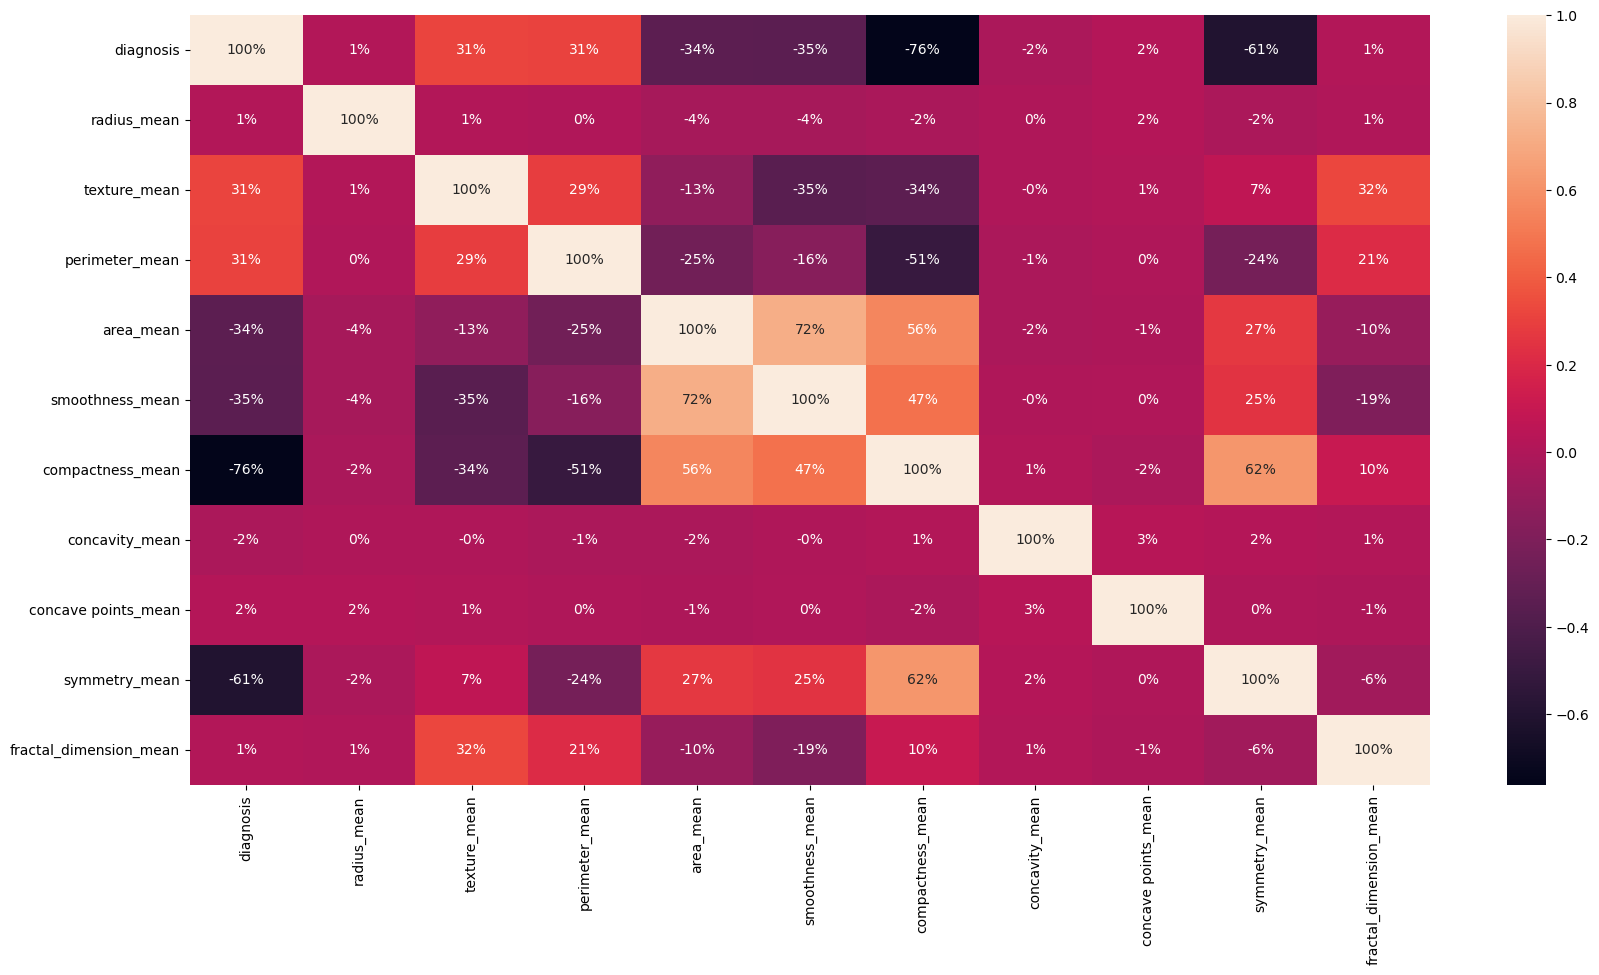

In [93]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.iloc[:, 0:11].corr(), annot=True, fmt='.0%') #fmt='.0%' to show the percentage
#To change color of the heatmap cmap='YlGnBu',
plt.show()      #This shows the Correlation between the Features    #The Correlation is between 0 and 1
#The Correlation is Strong when it is Close to 1